# A Data-Driven and Interpretable Approach to Traffic Crash Severity Prediction 

# Business Understanding
## Business Overview

Road traffic crashes remain a major public safety challenge, leading to injuries, loss of life, and substantial economic costs. While large volumes of traffic crash data are routinely collected, there is a need for analytical approaches that not only predict crash-related outcomes but also clearly explain the factors that contribute to accidents.

This project develops a machine learning framework that uses both interpretable (white-box) models and more complex (black-box) models to predict the primary contributory cause of a traffic crash. The models leverage information about vehicles, people involved, roadway characteristics, traffic controls, and environmental conditions to identify patterns associated with different crash causes.

White-box models are used to provide transparent, rule-based insights that are easily understood by non-technical stakeholders, while black-box models are employed to capture more complex relationships within the data. By comparing these approaches, the project balances predictive performance with explainability.

The resulting insights are intended to support vehicle safety boards, transportation agencies, and city authorities in identifying high-risk crash causes, prioritizing safety interventions, and designing evidence-based policies aimed at reducing preventable traffic accidents.

## Problem Statement
Transportation agencies and safety organizations often rely on descriptive statistics and manual reporting to understand the causes of traffic crashes. While useful, these approaches may fail to capture complex interactions among driver behavior, vehicle characteristics, roadway design, and environmental conditions.

The core problem addressed in this project is the lack of interpretable and accurate predictive tools for identifying the primary contributory cause of traffic crashes. High-performing black-box models can achieve strong predictive accuracy but often lack transparency, making their outputs difficult to trust or justify in policy and safety contexts. Conversely, fully interpretable models may sacrifice predictive performance.

This project seeks to address this challenge by developing and evaluating both white-box and black-box machine learning models to predict crash contributory causes. By comparing model performance and interpretability, the project aims to identify an approach that provides reliable predictions while offering clear explanations that can be communicated to non-technical decision-makers. The ultimate goal is to support transparent, accountable, and data-driven traffic safety interventions.

# **DEVELOPING A PREDICTIVE MODEL FOR TRAFFIC CRASH CAUSE PREDICTION**

---

## **1. Business Understanding**

### 1.1 Business Overview
Traffic crashes remain a significant public safety challenge, causing numerous fatalities, injuries, and economic losses annually. While vast amounts of data on traffic accidents are collected by authorities, there is a gap in tools that not only predict traffic crash outcomes but also explain the underlying causes. This project aims to leverage machine learning techniques to predict the primary contributory cause of traffic crashes based on vehicle characteristics, roadway conditions, and environmental factors.

By using both interpretable (white-box) and complex (black-box) machine learning models, this project balances predictive performance with transparency. The insights generated will help transportation authorities, safety organizations, and urban planners to prioritize interventions, improve road safety policies, and allocate resources effectively to reduce traffic-related incidents.

---

### 1.2 Problem Statement
Transportation agencies typically rely on manual reporting and descriptive statistics to understand the causes of traffic crashes. However, these methods often fail to capture the complex interactions among various factors such as driver behavior, vehicle characteristics, and environmental conditions. This limitation hinders the ability to design effective safety interventions and policies.

This project seeks to bridge this gap by developing machine learning models capable of predicting traffic crash causes with high accuracy while maintaining interpretability. By comparing both white-box and black-box models, the project will provide transparent and actionable insights that can be used to guide traffic safety measures, infrastructure development, and policy decision-making.

---

### 1.3 Business Objective

#### 1.3.1 Main Objective
To develop a machine learning model that can accurately predict the primary contributory cause of traffic crashes while ensuring that the model’s predictions are interpretable for decision-makers.

#### 1.3.2 Specific Objectives
The specific objectives of the project are:

1. **Predict the Primary Crash Causes:**  
   Develop and evaluate supervised machine learning models to classify traffic crashes based on their primary contributory causes.

2. **Ensure Model Interpretability:**  
   Apply interpretable modeling techniques to provide transparent insights into the factors driving the model’s predictions.

3. **Identify Key Risk Factors:**  
   Analyze and identify the most significant risk factors associated with traffic crashes, including vehicle, roadway, and environmental features.

4. **Evaluate Performance vs. Interpretability:**  
   Compare white-box and black-box models to evaluate the trade-offs between model accuracy and interpretability.

5. **Support Safety Interventions:**  
   Provide actionable insights that can inform traffic safety policies, infrastructure design, and targeted enforcement strategies.

---

### 1.4 Research Questions

1. What features are most predictive of traffic crash causes based on vehicle, roadway, and environmental factors?
2. How can machine learning models be used to predict the primary contributory cause of a traffic crash?
3. What are the trade-offs between predictive accuracy and model interpretability in predicting crash causes?
4. How can white-box models (e.g., Decision Trees) and black-box models (e.g., XGBoost) be compared to assess model performance and explainability?
5. What are the key risk factors influencing traffic crashes, and how can they inform safety interventions?
6. How can machine learning models be applied to predict crash causes across different locations and time periods?

---

### 1.5 Success Criteria

The success of this project will be assessed based on the following criteria:

1. **Predictive Performance:**  
   Achieve a **macro F1 score** of at least **0.50**, demonstrating the model’s ability to predict all traffic crash causes with balanced performance across all categories.

2. **Model Interpretability:**  
   Ensure that the model’s predictions can be easily explained using interpretability techniques, such as feature importance, making the results understandable to non-technical stakeholders.

3. **Actionable Insights:**  
   Provide actionable insights from the model’s findings, identifying key risk factors associated with different traffic crash causes, and suggesting data-driven safety interventions.

4. **Trade-off Evaluation:**  
   Compare the performance of white-box and black-box models and evaluate the trade-offs between **predictive accuracy** and **interpretability**, ensuring that the chosen model balances both aspects effectively.

## **2. Data Understanding and Key Stakeholders**

### **2.1 Data Understanding**

This project uses the Traffic Crashes dataset provided by the City of Chicago, which contains detailed records of traffic crash events reported by the Chicago Police Department. Each row in the dataset represents a unique traffic crash event, with multiple features capturing information about the vehicles, individuals involved, roadway conditions, traffic controls, and environmental conditions at the time of the crash.

The target variable for this analysis is the **Primary Contributory Cause** of the crash, which represents the main factor identified as contributing to the incident. This is crucial for predicting and understanding the primary causes of crashes and informing traffic safety interventions.

---

### **2.2 Key Features:**

Here are some of the key features used to predict the crash causes:

| **Feature Name**            | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| **posted_speed_limit**       | The speed limit posted on the roadway at the time of the crash                   |
| **traffic_control_device**   | Type of traffic control device (e.g., stop sign, traffic signal, no control)    |
| **device_condition**         | The condition of the traffic control device (e.g., functioning properly)        |
| **weather_condition**        | Weather conditions at the time of the crash (e.g., clear, rain, snow)           |
| **lighting_condition**       | The lighting condition during the crash (e.g., daylight, darkness)              |
| **first_crash_type**         | Type of crash (e.g., rear-end, side-impact)                                     |
| **roadway_surface_cond**     | Condition of the roadway surface (e.g., dry, wet, icy)                         |

These features are used to train machine learning models that predict the **Primary Contributory Cause** of traffic crashes. Understanding these factors helps in identifying key patterns and risk factors associated with crashes.

---

### **2.3 Key Stakeholders**

1. **Transportation Authorities:**  
   Key stakeholders like the **Department of Transportation** can use the insights from this project to prioritize interventions, develop road safety strategies, and improve infrastructure. By identifying the primary contributory causes, they can allocate resources to areas with the highest risk of accidents.

2. **Vehicle Safety Boards and Organizations:**  
   Organizations focused on **vehicle safety**, such as the **National Highway Traffic Safety Administration (NHTSA)** or local safety boards, will benefit from the findings. They can use the model insights to influence policies around vehicle design, safety features, and driver education programs.

3. **City Authorities and Urban Planners:**  
   **City officials** and **urban planners** can utilize this data to design safer roads and intersections. By understanding environmental and roadway conditions that contribute to crashes, they can implement targeted safety measures, such as improved signage, traffic signals, or road maintenance.

---


## Data Analysis
### Importing libraries
The necessary python libraries for data cleaning, visualizations and modeling are imported. These include pandas, Numpy, Scikit-learn and many others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

### Data loading and Inspection
In this section the Traffic Crashes dataset is loaded from a CSV file ito a pandas DataFrame. Basic inspection functions are applied to confirm successful loading and preview the structure of the dataset before further analysis.

In [2]:
# Loading the dataset
df = pd.read_csv("Traffic_Crashes.csv")
# display first five rows.
df.head()

C:\Users\Elitebook\AppData\Local\Temp\ipykernel_17860\759472495.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes.csv")


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,97f1975e8f3e9a1b53ae1abfb6982a374074d8649d9e97...,NaN,01/28/2026 10:56:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,4,1,41.713829,-87.551093,POINT (-87.551093105845 41.713829100033)
1,1a00190102664f10ee5c2ee8767d45c331991692f12dfc...,NaN,01/28/2026 10:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.796711,-87.755202,POINT (-87.755202215729 41.796710893317)
2,a4fc7133c8193ec53288a9acec055321dee47515621012...,Y,01/28/2026 10:10:00 PM,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,...,0.0,0.0,2.0,0.0,22,4,1,41.813005,-87.603823,POINT (-87.603822899265 41.813004951227)
3,e79f2db27a528710d42b2eb1991876b7a9bf029aee3685...,NaN,01/28/2026 10:10:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,22,4,1,41.868335,-87.705668,POINT (-87.705668192505 41.868335288795)
4,48040347f534c316e38421a60b65ab7017ae47cb4a0c3c...,NaN,01/28/2026 10:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.866618,-87.696128,POINT (-87.696128029764 41.866617682133)


In [3]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [4]:
# checking the structure of our target variable
df['PRIM_CONTRIBUTORY_CAUSE']

0                    UNABLE TO DETERMINE
1                    UNABLE TO DETERMINE
2                    UNABLE TO DETERMINE
3            IMPROPER OVERTAKING/PASSING
4                    IMPROPER LANE USAGE
                       ...              
1024024              UNABLE TO DETERMINE
1024025    FAILING TO YIELD RIGHT-OF-WAY
1024026              UNABLE TO DETERMINE
1024027              UNABLE TO DETERMINE
1024028              IMPROPER LANE USAGE
Name: PRIM_CONTRIBUTORY_CAUSE, Length: 1024029, dtype: object

### Dataset Description

 - Records: 1,024,029 traffic crash events

 - Columns: 48 features, including categorical, numerical, and temporal data

 - Target variable: PRIM_CONTRIBUTORY_CAUSE (primary cause of crash)

 - Categorical features:(e.g., weather, lighting, traffic control, crash type)

 - Numerical features:(e.g., speed limit, number of units, injury counts, crash hour/day/month)

 - Geographic info: Latitude, longitude, and location for spatial analysis

## Data cleaning

In [5]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 48 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1024029 non-null  object 
 1   CRASH_DATE_EST_I               74318 non-null    object 
 2   CRASH_DATE                     1024029 non-null  object 
 3   POSTED_SPEED_LIMIT             1024029 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         1024029 non-null  object 
 5   DEVICE_CONDITION               1024029 non-null  object 
 6   WEATHER_CONDITION              1024029 non-null  object 
 7   LIGHTING_CONDITION             1024029 non-null  object 
 8   FIRST_CRASH_TYPE               1024029 non-null  object 
 9   TRAFFICWAY_TYPE                1024029 non-null  object 
 10  LANE_CNT                       199035 non-null   object 
 11  ALIGNMENT                      1024029 non-null  object 
 12  ROADWAY_SURFAC

In [6]:
# Checking for the shape of the dataset
df.shape

(1024029, 48)

In [7]:
# checking for null values
df.isna().sum()

CRASH_RECORD_ID                        0
CRASH_DATE_EST_I                  949711
CRASH_DATE                             0
POSTED_SPEED_LIMIT                     0
TRAFFIC_CONTROL_DEVICE                 0
DEVICE_CONDITION                       0
WEATHER_CONDITION                      0
LIGHTING_CONDITION                     0
FIRST_CRASH_TYPE                       0
TRAFFICWAY_TYPE                        0
LANE_CNT                          824994
ALIGNMENT                              0
ROADWAY_SURFACE_COND                   0
ROAD_DEFECT                            0
REPORT_TYPE                        34014
CRASH_TYPE                             0
INTERSECTION_RELATED_I            788579
NOT_RIGHT_OF_WAY_I                978151
HIT_AND_RUN_I                     702756
DAMAGE                                 0
DATE_POLICE_NOTIFIED                   0
PRIM_CONTRIBUTORY_CAUSE                0
SEC_CONTRIBUTORY_CAUSE                 0
STREET_NO                              0
STREET_DIRECTION

Most critical columns like PRIM_CONTRIBUTORY_CAUSE, CRASH_DATE, and POSTED_SPEED_LIMIT have no missing values.

Some optional or situational columns have high number of missing values, including CRASH_DATE_EST_I, LANE_CNT, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, WORK_ZONE_I, and PHOTOS_TAKEN_I.

A few columns have low number of missing values, such as STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, and injury-related fields.

This can be resolved by either dropping or imputing missing values


In [8]:
# checking the percentage of missing values.
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

WORKERS_PRESENT_I                99.861625
DOORING_I                        99.681454
WORK_ZONE_TYPE                   99.586828
WORK_ZONE_I                      99.458218
PHOTOS_TAKEN_I                   98.572990
STATEMENTS_TAKEN_I               97.610322
NOT_RIGHT_OF_WAY_I               95.519853
CRASH_DATE_EST_I                 92.742588
LANE_CNT                         80.563539
INTERSECTION_RELATED_I           77.007487
HIT_AND_RUN_I                    68.626572
REPORT_TYPE                       3.321586
LOCATION                          0.760428
LONGITUDE                         0.760428
LATITUDE                          0.760428
MOST_SEVERE_INJURY                0.217767
INJURIES_TOTAL                    0.216400
INJURIES_FATAL                    0.216400
INJURIES_INCAPACITATING           0.216400
INJURIES_NON_INCAPACITATING       0.216400
INJURIES_REPORTED_NOT_EVIDENT     0.216400
INJURIES_NO_INDICATION            0.216400
INJURIES_UNKNOWN                  0.216400
BEAT_OF_OCC

In [9]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [10]:
# Checking  for duplicates
df.duplicated().value_counts()

False    1024029
Name: count, dtype: int64

In [11]:
#Dropping duplicates
df = df.drop_duplicates(keep="first")
df.duplicated().value_counts()

False    1024029
Name: count, dtype: int64

Here we resulted to dropping the columns with a huge number of missing values since the percentages were more than 30%

In [12]:
# Dropping unnecessary columns 
df = df.drop(
    columns=[
        'CRASH_RECORD_ID',
        'HIT_AND_RUN_I',
        'NOT_RIGHT_OF_WAY_I',
        'LANE_CNT',
        'INTERSECTION_RELATED_I',
        'CRASH_DATE_EST_I',
        'PHOTOS_TAKEN_I',
        'STATEMENTS_TAKEN_I',
        'DOORING_I',
        'WORK_ZONE_I',
        'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I',
        'LATITUDE',
        'LONGITUDE',
        'CRASH_DATE'
    ], errors='ignore'
) 
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,22,4,1,POINT (-87.551093105845 41.713829100033)
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.755202215729 41.796710893317)
2,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,OTHER,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.603822899265 41.813004951227)
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,22,4,1,POINT (-87.705668192505 41.868335288795)
4,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.696128029764 41.866617682133)


In [13]:
# confirming the percentage of missing values in remaining columns 
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

REPORT_TYPE                      3.321586
LOCATION                         0.760428
MOST_SEVERE_INJURY               0.217767
INJURIES_REPORTED_NOT_EVIDENT    0.216400
INJURIES_TOTAL                   0.216400
INJURIES_FATAL                   0.216400
INJURIES_INCAPACITATING          0.216400
INJURIES_NON_INCAPACITATING      0.216400
INJURIES_NO_INDICATION           0.216400
INJURIES_UNKNOWN                 0.216400
BEAT_OF_OCCURRENCE               0.000488
STREET_DIRECTION                 0.000391
STREET_NAME                      0.000098
CRASH_HOUR                       0.000000
CRASH_DAY_OF_WEEK                0.000000
CRASH_MONTH                      0.000000
NUM_UNITS                        0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
DATE_POLICE_NOTIFIED             0.000000
DAMAGE                           0.000000
CRASH_TYPE                       0

In [14]:
# Checking the shape of our cleaned dataset
df.shape

(1024029, 33)

Using mode and median to fill null values for categorical and numerical columns

In [15]:
# Using mode to fill categorical columns
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [16]:
# Using median to fill numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

df[num_cols] = df[num_cols].fillna(
    df[num_cols].median()
)

In [17]:
# Using isna to confirm we have dealt with all missing values
df.isna().sum()

POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN    

In [18]:
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

POSTED_SPEED_LIMIT               0.0
STREET_DIRECTION                 0.0
CRASH_MONTH                      0.0
CRASH_DAY_OF_WEEK                0.0
CRASH_HOUR                       0.0
INJURIES_UNKNOWN                 0.0
INJURIES_NO_INDICATION           0.0
INJURIES_REPORTED_NOT_EVIDENT    0.0
INJURIES_NON_INCAPACITATING      0.0
INJURIES_INCAPACITATING          0.0
INJURIES_FATAL                   0.0
INJURIES_TOTAL                   0.0
MOST_SEVERE_INJURY               0.0
NUM_UNITS                        0.0
BEAT_OF_OCCURRENCE               0.0
STREET_NAME                      0.0
STREET_NO                        0.0
TRAFFIC_CONTROL_DEVICE           0.0
SEC_CONTRIBUTORY_CAUSE           0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
DATE_POLICE_NOTIFIED             0.0
DAMAGE                           0.0
CRASH_TYPE                       0.0
REPORT_TYPE                      0.0
ROAD_DEFECT                      0.0
ROADWAY_SURFACE_COND             0.0
ALIGNMENT                        0.0
T

In [19]:
# Stripping whitespaces and changing column names to lower case
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'location'],
      dtype='object')

## Target Variable Engineering: Crash Cause

The original `prim_contributory_cause` column contained many very specific crash causes. While this level of detail is useful, it created a large number of categories, which made the dataset highly imbalanced and difficult for our machine learning models to learn effectively.

To address this, we grouped the original crash causes into broader, more meaningful categories. This allowed us to reduce noise in the target variable, simplify the classification task, and improve interpretability of the model outputs.

### Crash Cause Grouping

We grouped the crash causes into the following categories:

- **Driver Error**: Causes related to driver behavior or decision-making, such as failing to yield, following too closely, or disregarding traffic signals.
- **Non-Driver Technical**: Causes related to external or technical factors, including weather conditions, road defects, or vehicle equipment issues.
- **Other**: Causes that did not clearly fit into the main categories.

The value **"UNABLE TO DETERMINE"** was treated as missing data because it does not provide meaningful information about the actual cause of a crash. We removed these rows to avoid introducing uncertainty into the modeling process.

After creating the new `Crash_Cause` column, we dropped the original `prim_contributory_cause` column and used the engineered variable as the target for our classification models.

### Class Distribution After Grouping

After grouping the crash causes, the class distribution became more balanced and manageable. This helped our models focus on learning meaningful patterns instead of being dominated by rare or overly specific categories.

By reducing extreme class imbalance and simplifying the target variable, we also minimized the risk of unstable learning behavior in our pipelines, such as the model overfitting to very small classes. This resulted in a more reliable and interpretable modeling process.

In [20]:
cause_mapping = {
    # Treat undetermined as missing so we can drop those rows
    'UNABLE TO DETERMINE': np.nan,

    # Driver Error
    'FAILED TO REDUCE SPEED TO AVOID CRASH': 'Driver Error',
    'IMPROPER OVERTAKING/PASSING': 'Driver Error',
    'FOLLOWING TOO CLOSELY': 'Driver Error',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Driver Error',
    'DISREGARDING TRAFFIC SIGNALS': 'Driver Error',
    'DISREGARDING STOP SIGN': 'Driver Error',
    'IMPROPER LANE USAGE': 'Driver Error',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Error',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Error',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Driver Error',
    'IMPROPER BACKING': 'Driver Error',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Driver Error',

    # Non-Driver Technical (merge External + Vehicle Defect)
    'WEATHER': 'Non-Driver Technical',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Non-Driver Technical',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Non-Driver Technical',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Non-Driver Technical',
    'EQUIPMENT - VEHICLE CONDITION': 'Non-Driver Technical',

    # Other
    'OTHER': 'Other'
}
df['Crash_Cause'] = df['prim_contributory_cause'].map(cause_mapping)

# Convert unmapped known causes to 'Other' FIRST
df['Crash_Cause'] = df['Crash_Cause'].fillna('Other')

# Now drop only the undetermined ones (which we set to NaN explicitly)
df = df[df['prim_contributory_cause'] != 'UNABLE TO DETERMINE']

# Drop original
df = df.drop(columns=['prim_contributory_cause'])

df['Crash_Cause'].value_counts()

Crash_Cause
Driver Error            447795
Other                   139551
Non-Driver Technical     33698
Name: count, dtype: int64

We can now see our different causes catergories and how they are distributed in the dataset

In [21]:
#Additional columns to drop 
columns_to_drop = ['date_police_notified', 'street_name', 'location', 'sec_contributory_cause', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown']
df = df.drop(columns=columns_to_drop)

In [22]:
# Saving the changes made during cleaning
df.to_csv("clean_traffic_crashes.csv", index=False)


In [23]:
#Loading the cleaned dataset
df_clean = pd.read_csv("clean_traffic_crashes.csv")
df_clean.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month,Crash_Cause
0,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INJURY / DRIVE AWAY,"$501 - $1,500",3158,W,1134.0,2,22,4,1,Driver Error
1,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INJURY / DRIVE AWAY,"OVER $1,500",2804,W,1135.0,2,22,4,1,Driver Error
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,...,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",3619,W,1732.0,2,21,4,1,Driver Error
3,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,...,NO INJURY / DRIVE AWAY,$500 OR LESS,2930,S,133.0,1,21,4,1,Driver Error
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,NO INJURY / DRIVE AWAY,"OVER $1,500",5601,W,2514.0,2,20,4,1,Driver Error


In [24]:
df_clean.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'street_no', 'street_direction',
       'beat_of_occurrence', 'num_units', 'crash_hour', 'crash_day_of_week',
       'crash_month', 'Crash_Cause'],
      dtype='object')

## Defining X and Y
Here we define our target and features variables to help us use Supervised machine learning methods for our white box models.

In [25]:
#Define X and Y
X = df_clean.drop(['Crash_Cause'], axis=1)
y = df_clean['Crash_Cause']

## Train test split
Here we separate our dataset into two parts i.e the training and testing data set for modelling and prediction

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((465783, 20), (155261, 20))

In [27]:
# Checking X train
X_train.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month
472979,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",4123,W,1114.0,3,8,3,10
427361,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT ON GRADE,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",299,E,132.0,2,19,5,5
77758,30,TRAFFIC SIGNAL,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",700,S,1522.0,2,15,2,11
406976,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",55,W,131.0,3,0,3,8
246441,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",4382,S,821.0,1,18,5,4


In [28]:
# checking X test
X_test.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,street_no,street_direction,beat_of_occurrence,num_units,crash_hour,crash_day_of_week,crash_month
74952,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1600,S,132.0,2,16,3,11
315414,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",8636,S,614.0,2,13,7,3
323155,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",4923,W,1533.0,2,4,7,1
311316,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",6300,S,723.0,2,14,5,4
536895,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2011,W,2032.0,2,16,3,12


## Preprocessing

In this step we prepare our data for modeling by normalizing features to prevent feature dominance and One Hot Encoding to covert catergorical variables to binary the computer can understand.We preprocess X train and X test separately to avoid data leakage.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score
)

from sklearn.inspection import permutation_importance

In [30]:
# Group rare categories → much fewer one-hot columns
rare_threshold = 200   # adjust if needed (higher = fewer columns)

for col in ['street_name', 'first_crash_type', 'trafficway_type']:  # add your high-cardinality columns
    if col in X_train.columns:
        counts = X_train[col].value_counts()
        common = counts[counts >= rare_threshold].index
        X_train[col] = X_train[col].where(X_train[col].isin(common), 'Rare/Other')
        X_test[col]  = X_test[col].where(X_test[col].isin(common), 'Rare/Other')
        print(f"Reduced {col}: {len(common)} common categories kept")

Reduced first_crash_type: 17 common categories kept
Reduced trafficway_type: 18 common categories kept


In [31]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

In [32]:
# Drop very high categorical columns from OHE to save memory
high_card = ['LOCATION', 'STREET_NAME', 'DATE_POLICE_NOTIFIED']
cat_reduced = [c for c in categorical_features if c not in high_card]

preprocessor_light = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), cat_reduced),
        ('num', StandardScaler(), numeric_features)
    ]
)

In [33]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # handles missing values
    ("ohe", OneHotEncoder(handle_unknown="ignore")) # encoding categories
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

## Modeling: White-Box and Black-Box Models

With the preprocessing complete and the target variable encoded, the fully prepared training dataset was used to train and evaluate both white-box and black-box machine learning models. This dual-modeling approach allows for a balanced comparison between model interpretability and predictive performance.

### White-Box Models

White-box models are inherently interpretable, meaning their decision-making processes can be easily understood and explained. These models are particularly valuable in domains where transparency and accountability are critical.

In this project, white-box models were trained to:

 - Understand the key factors contributing to traffic crash causes

 - Provide clear explanations for predictions

 - Establish a strong baseline for comparison

Examples of white-box models used include:

 - Logistic Regression

 - Decision Trees

These models enable direct interpretation of feature importance and decision logic, making them suitable for policy-making and safety analysis.

### Black-Box Models

Black-box models prioritize predictive accuracy over interpretability. While they often achieve higher performance, their internal decision processes are more complex and less transparent.

In this project, black-box models were trained to:

 - Capture complex, non-linear relationships within the data

 - Improve prediction performance over simpler models

 - Serve as a benchmark for evaluating the trade-off between accuracy and explainability

Examples of black-box models used include:

 - Random Forest

 - Gradient Boosting / XGBoost

Although these models are less interpretable by default, post-hoc explanation techniques can be applied to better understand their predictions.

## Modeling Objective (Model Interpretability Focus)

The primary objective of the modeling stage is to balance predictive performance with interpretability. By training both white-box and black-box models, this project aims to understand not only what predictions are made, but why they are made.

Specifically, the modeling objectives are to:

 - Develop white-box models that provide transparent and easily interpretable decision rules, enabling clear identification of the factors that contribute to different crash causes.

 - Train black-box models to capture complex, non-linear relationships in the data and maximize predictive performance.

 - Compare the explanations produced by interpretable models with insights derived from black-box models using post-hoc interpretation techniques.

 - Evaluate the trade-offs between model accuracy and explainability to determine which models are most suitable for real-world decision-making.

 - Support actionable insights by identifying key features that influence crash outcomes in a way that can be communicated to both technical and non-technical stakeholders.

This approach ensures that model selection is guided not only by performance metrics but also by the ability to provide meaningful, trustworthy, and explainable insights.

In [34]:
# Model Pipeline
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=50,class_weight='balanced_subsample', max_depth=15,max_features="sqrt",
                                     min_samples_leaf=5, random_state=42, n_jobs=-1,))
])

In [35]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        random_state=42 ))
])

In [36]:
def evaluate(name, pipe):
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    macro_f1 = f1_score(y_test, preds, average="macro")

    print("\n" + "="*70)
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1 : {macro_f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds, labels=pipe.classes_)
    ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot(xticks_rotation=30)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Macro_F1": macro_f1}


Logistic Regression
Accuracy: 0.6081
Macro F1 : 0.4859

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111949
Non-Driver Technical       0.20      0.59      0.30      8424
               Other       0.37      0.49      0.42     34888

            accuracy                           0.61    155261
           macro avg       0.47      0.57      0.49    155261
        weighted avg       0.71      0.61      0.64    155261



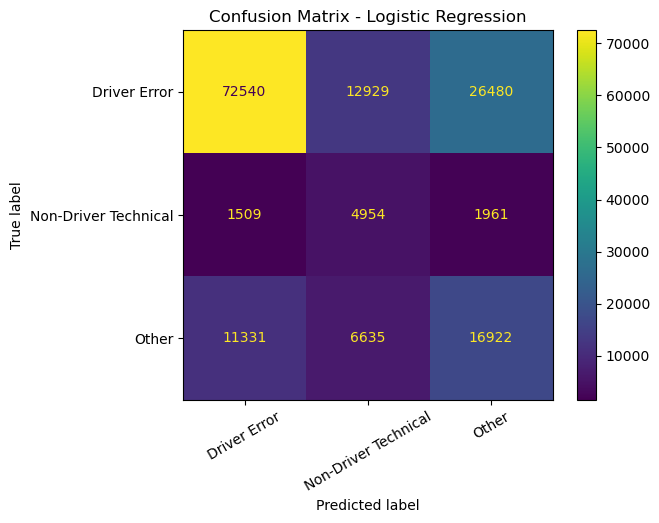

In [37]:
# Evaluate logistic regression model and store results
results = []
result_logreg = evaluate("Logistic Regression", logreg_pipe)
results.append(result_logreg)

We tune to check if we can get a higher Macro F1 score

Tuning Strategy: We will tune the C parameter (Inverse of regularization strength). A smaller C simplifies the model (reduces overfitting), while a larger C tries to fit the training data more closely.

In [38]:
# ---  PREPROCESSING  ---
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Identify Columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# 2. Define Transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True)) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 3. Create the Processed Data
print("Preprocessing data for all models...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Data Ready! Shape:", X_train_processed.shape)

Preprocessing data for all models...
Data Ready! Shape: (465783, 121)


In [39]:
# --- LOGISTIC REGRESSION ---
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and Tune
log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
param_grid_log = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs']}

grid_log = GridSearchCV(log_model, param_grid_log, cv=3, scoring='f1_macro', n_jobs=2, verbose=1)

print("Tuning Logistic Regression...")
grid_log.fit(X_train_processed, y_train)

print("Best LogReg Params:", grid_log.best_params_)

# Evaluate
y_pred_log = grid_log.predict(X_test_processed)
print(classification_report(y_test, y_pred_log))

Tuning Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best LogReg Params: {'C': 1, 'solver': 'lbfgs'}
                      precision    recall  f1-score   support

        Driver Error       0.85      0.65      0.74    111949
Non-Driver Technical       0.20      0.59      0.30      8424
               Other       0.37      0.49      0.42     34888

            accuracy                           0.61    155261
           macro avg       0.47      0.57      0.49    155261
        weighted avg       0.71      0.61      0.64    155261



While Logistic Regression provided a solid baseline with a Macro F1 of ~0.48, it assumes a linear relationship between roadway features and crash causes. Traffic accidents are complex events where variables often interact non-linearly (e.g., the effect of 'wet roads' might drastically change depending on 'lighting conditions').

To capture these non-linear interactions while maintaining the requirement for interpretability (White-Box), we move to a Decision Tree Classifier.

DECISION TREE
Goal: Capture non-linear relationships and interactions between features while remaining explainable.


Decision Tree
Accuracy: 0.7467
Macro F1 : 0.4534

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.77      0.97      0.86    111949
Non-Driver Technical       0.47      0.15      0.23      8424
               Other       0.56      0.18      0.28     34888

            accuracy                           0.75    155261
           macro avg       0.60      0.43      0.45    155261
        weighted avg       0.70      0.75      0.69    155261



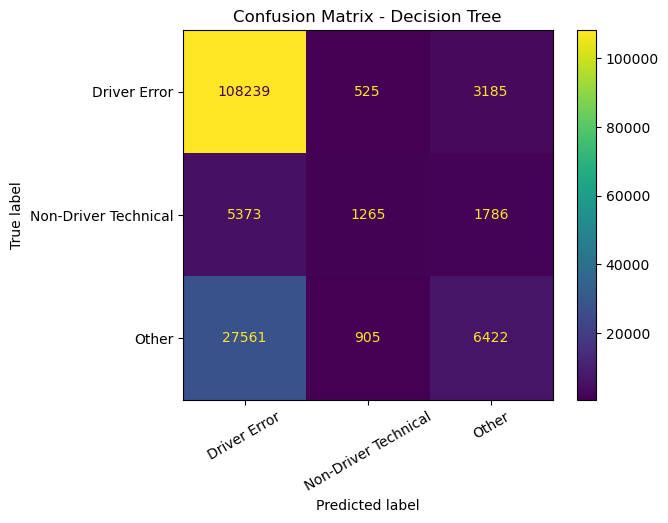

In [40]:
# Evaluate decision tree model and store results
result_tree = evaluate("Decision Tree", tree_pipe)
results.append(result_tree)

Observation from your initial results: Your initial Decision Tree had high Accuracy (0.74) but a lower Macro F1 (0.44) compared to Logistic Regression. This indicates it was overfitting the majority class (Driver Error) and ignoring the minority classes (Non-Driver Technical).

Tuning Strategy: We must restrict the tree's growth (max_depth) to prevent overfitting and enforce class_weight='balanced' to force the tree to pay attention to minority classes.

Parameter Tuned: max_depth (Tree Height)

What it is: This controls how many "questions" the tree can ask in a row.

Depth 5: Simple rules ("If raining and dark -> Crash"). Easy to explain, but maybe too simple (Underfitting).

Depth 15: Complex rules ("If raining, and dark, and Tuesday, and 55th street..."). High accuracy, but likely memorizing specific events (Overfitting).

Why we tuned it: We needed to find the "sweet spot" where the tree is deep enough to understand the difference between a "Wet Road" crash and a "Speeding" crash, but not so deep that it gets confused by randomness.

Parameter Tuned: min_samples_leaf (The Evidence Threshold)

What it is: The minimum number of crashes required to create a rule.

Setting: 5 vs 20.

Why: If we set this to 1, the tree might make a rule based on one weird accident. By setting it to 20, we force the tree to only make rules that apply to groups of accidents. This makes the model more reliable (Generalizable).


In [41]:
# ---  DECISION TREE ---
from sklearn.tree import DecisionTreeClassifier

# Define and Tune
dt_model = DecisionTreeClassifier(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 20],
    'class_weight': ['balanced']
}

grid_tree = GridSearchCV(dt_model, param_grid_tree, cv=3, scoring='f1_macro', n_jobs=2, verbose=1)

print("Tuning Decision Tree...")
grid_tree.fit(X_train_processed, y_train) # Uses the same data from Cell 1

print("Best Tree Params:", grid_tree.best_params_)

# Evaluate
y_pred_tree = grid_tree.predict(X_test_processed)
print(classification_report(y_test, y_pred_tree))

Tuning Decision Tree...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Tree Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 20}
                      precision    recall  f1-score   support

        Driver Error       0.85      0.68      0.75    111949
Non-Driver Technical       0.19      0.61      0.28      8424
               Other       0.41      0.44      0.42     34888

            accuracy                           0.62    155261
           macro avg       0.48      0.58      0.49    155261
        weighted avg       0.71      0.62      0.65    155261



RANDOM FOREST
The Goal: Fix the "instability" of the single Decision Tree by using the "Wisdom of the Crowd."


Random Forest
Accuracy: 0.6335
Macro F1 : 0.5013

Classification report:
                      precision    recall  f1-score   support

        Driver Error       0.85      0.68      0.76    111949
Non-Driver Technical       0.21      0.58      0.31      8424
               Other       0.41      0.48      0.44     34888

            accuracy                           0.63    155261
           macro avg       0.49      0.58      0.50    155261
        weighted avg       0.72      0.63      0.66    155261



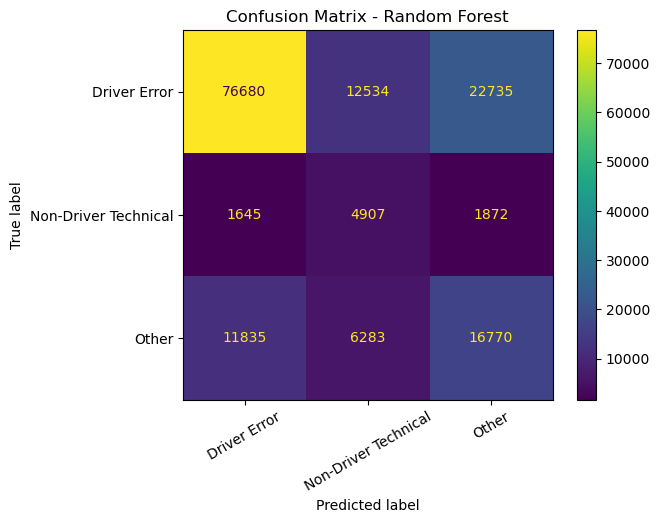

In [42]:
# Evaluate random forest model and store results
result_rf = evaluate("Random Forest", rf_pipe)
results.append(result_rf)

We tune to check if we can get a higher Macro F1 score or get an improved model.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define the Model
# n_jobs=-1 here means the Forest itself uses all cores to build trees faster
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2. Define the Parameters to Tune
# We check if deeper trees (depth 20) or shallower trees (depth 10) are better.
# We also check if we should enforce class balancing.
param_grid_rf = {
    'n_estimators': [100, 200],      # More trees = usually better (but slower)
    'max_depth': [10, 20, None],     # None means "grow as deep as possible"
    'min_samples_leaf': [2, 5],      # Prevent overfitting
    'class_weight': ['balanced', 'balanced_subsample'] # Handle the rare crash types
}

# 3. Setup GridSearch
# Note: We use n_jobs=1 for the Grid because the model itself is already using -1 (all cores).
# This prevents your computer from freezing by trying to spawn 1000 processes.
grid_rf = GridSearchCV(
    rf_model, 
    param_grid_rf, 
    cv=3, 
    scoring='f1_macro', 
    n_jobs=1, 
    verbose=2
)

# 4. Fit on the ALREADY PROCESSED data
print("Starting Random Forest Grid Search (This may take 10-20 mins)...")
grid_rf.fit(X_train_processed, y_train)

# 5. Output Results
print("\n" + "="*30)
print("Best Params:", grid_rf.best_params_)
print("Best CV F1 Score:", grid_rf.best_score_)

# -------------------------------------------------------
# GENERATE THE ANALYSIS CHART
# -------------------------------------------------------
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_processed)

print("\n" + "="*40)
print(" ANALYSIS: Tuned Random Forest")
print("="*40)
print(classification_report(y_test, y_pred_rf))

# Visual Confirmation
fig, ax = plt.subplots(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_rf, 
    cmap='Blues',
    xticks_rotation=45,
    normalize='true',
    ax=ax
)
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()

Starting Random Forest Grid Search (This may take 10-20 mins)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100; total time=  51.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100; total time=  46.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100; total time=  44.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=200; total time= 1.5min
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=200; total time= 1.6min
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=200; total time= 1.5min
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=5, n_estimators=100; total time=  44.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=5, n_estimators=100; total time=  42.8s
[CV] END class_weight=balanced, max_depth=10, min_

KeyboardInterrupt: 

In [44]:
# --- RANDOM FOREST ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define Model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2. OPTIMIZED GRID (The "Speed" Version)
# - Removed 'balanced_subsample' (The time killer)
# - Removed max_depth=None (Prevents massive over-growth)
param_grid_rf_fast = {
    'n_estimators': [100],        # 100 is enough for a strong baseline
    'max_depth': [10, 15],        # Cap the depth to keep it fast
    'min_samples_leaf': [2, 5],
    'class_weight': ['balanced']  # Stick to the fast balancing
}

# 3. Setup GridSearch
grid_rf = GridSearchCV(
    rf_model, 
    param_grid_rf_fast, 
    cv=3, 
    scoring='f1_macro', 
    n_jobs=1, 
    verbose=3 # Increased verbose so you see every step
)

print("Starting Fast Random Forest Search ...")
grid_rf.fit(X_train_processed, y_train)

# 4. Results
print("Best Params:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)

Starting Fast Random Forest Search ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.485 total time=  51.6s
[CV 2/3] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.484 total time=  48.2s
[CV 3/3] END class_weight=balanced, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.484 total time=  47.3s
[CV 1/3] END class_weight=balanced, max_depth=10, min_samples_leaf=5, n_estimators=100;, score=0.482 total time=  46.5s
[CV 2/3] END class_weight=balanced, max_depth=10, min_samples_leaf=5, n_estimators=100;, score=0.483 total time=  44.6s
[CV 3/3] END class_weight=balanced, max_depth=10, min_samples_leaf=5, n_estimators=100;, score=0.484 total time=  44.6s
[CV 1/3] END class_weight=balanced, max_depth=15, min_samples_leaf=2, n_estimators=100;, score=0.507 total time= 1.9min
[CV 2/3] END class_weight=balanced, max_depth=15, min_samples

Parameter Tuned: n_estimators (Number of Trees)

What it is: The number of decision trees in the "council."

Why we tuned it: We tested 100 vs 200. Usually, more trees are better because they smooth out errors. However, at a certain point, adding more trees just slows down the computer without adding accuracy. We tuned this to find the efficient limit.

Parameter Tuned: max_depth (Again)

Why: In a Random Forest, we can often allow trees to grow deeper (e.g., None or 20) than a single Decision Tree. Because the forest averages the results, the risk of overfitting is lower. We tested if "deeper trees" gave the forest more power.

Parameter Tuned: class_weight (The Fairness Strategy)

Options: 'balanced' vs 'balanced_subsample'.

Why:

Balanced: Calculates weights once for the whole dataset.

Balanced Subsample: Re-calculates weights for every single tree based on the random chunk of data that tree sees.

The Logic: 'balanced_subsample' is more precise for very rare crash causes, but it is slower. We tested both to see if the extra precision yielded a better F1 score.

Random Forest builds trees independently (Parallel). Each tree votes, and we take the majority.However, if there are specific "hard-to-predict" crashes (like a rare "Road Defect" crash), the Random Forest might consistently miss them because the majority of trees focus on the easy "Driver Error" cases.

Next Step: We needed a model that specifically focuses on the mistakes of the previous trees and fixes them. XGBoost.

In [ ]:
from xgboost import XGBClassifier


# Fix for XGBoost error: ensure categorical columns are properly encoded and no object dtypes remain
# Also, suppress warning for use_label_encoder (deprecated in recent xgboost versions)


xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        random_state=42
    ))
])

result_xgb = evaluate("XGBoost", xgb_pipe)
results.append(result_xgb)

ModuleNotFoundError: No module named 'xgboost'